# Simulating Quantum Circuits

This code simulates the execution of simple quantum circuits and displays the results in a histogram

In [16]:
from qiskit import QuantumCircuit
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

An example quantum circuit is specified below:

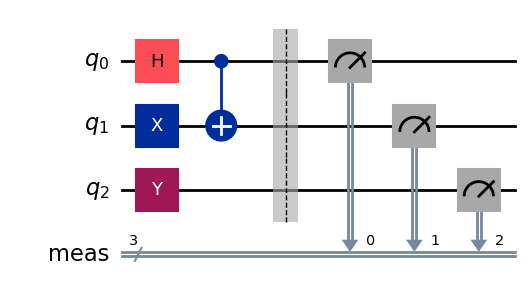

In [17]:
n = 3
circuit = QuantumCircuit(n) # Initializes a Circuit with n qubits

circuit.h(0)
circuit.x(1)
circuit.cx(0, 1)
circuit.y(2)

circuit.measure_all()

circuit.draw(output="mpl")

The following cell runs the circuit and tabulates the results. Because quantum circuits are inherently probalistic (quantum circuits lead to a finite probability of each measurement outcome, rather than always producing a single, deterministic outcome), and current quantum computers are very noisy, results are interpreted by running quantum circuits a large number of times and studying the resulting distribution. The number of times that the circuit is run is determined by the "shots" parameter.

In [18]:
shots = 3000                            # number of times circuit is run
sim = AerSimulator()
job = sim.run(circuit, shots=shots)
result = job.result()


counts = result.get_counts(circuit)     # Display the results

print("Measurement results:")
for state, count in sorted(counts.items(), key=lambda x: -x[1]):
    percentage = (count / shots) * 100
    print(f"{state} : {count} ({percentage:.2f}%)")

Measurement results:
110 : 1520 (50.67%)
101 : 1480 (49.33%)


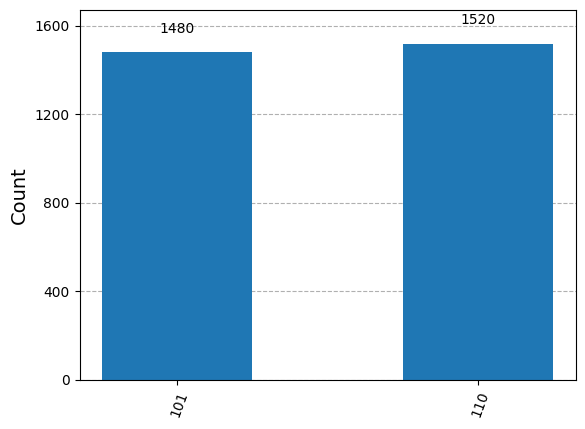

In [20]:
plot_histogram(counts)